In [50]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
import statsmodels.api as sm

from cointegration_functions import *

stocks = pd.read_csv("./stocks_1990_2025.csv", index_col = 0)

stocks.index = pd.to_datetime(stocks.index)
time_frame = stocks.index
months = pd.Series(time_frame).dt.to_period('M').unique()  # Extract unique months
formation_start = pd.Timestamp(months[200].start_time)
formation_end = formation_start + pd.DateOffset(months=24)-pd.DateOffset(days=1)  # 24 months later
trading_start = formation_start + pd.DateOffset(months=24)
trading_end = formation_end + pd.DateOffset(months=6)  # Next 6 months

stocks_normalized = normalize(stocks.loc[formation_start:trading_end])
# Select formation period data   
stocks_formation = stocks_normalized.loc[formation_start:formation_end]
# Select testing data (next 6 months)
stocks_trading = stocks_normalized.loc[trading_start:trading_end]
pairs = calculate_and_sort_ssd(stocks_formation)
portfolio = select_cointegrated_pairs(stocks_formation,pairs)
spread_df, spread_df_norm = calculate_portfolio_spread(stocks_trading, portfolio)


Sorting all combinations by SSD...

---------------------------------------------------------------------------------------------------- 
Processing pair: GOOG - GOOGL
fitting ols....
OLS p-values:
 GOOG    0.0
dtype: float64

 0.0
OLS FIT FOUND....
ADF p value:  0.0
Pair was selected and added to the portfolio!

 pair count is : 1
---------------------------------------------------------------------------------------------------- 
Processing pair: EVRG - XEL
fitting ols....
OLS p-values:
 EVRG    0.0
dtype: float64

 0.0
OLS FIT FOUND....
ADF p value:  0.007614563146469919
Pair was selected and added to the portfolio!

 pair count is : 2
---------------------------------------------------------------------------------------------------- 
Processing pair: CLX - ED
fitting ols....
OLS p-values:
 CLX    0.0
dtype: float64

 0.0
OLS FIT FOUND....
ADF p value:  0.009561428231890379
Pair was selected and added to the portfolio!

 pair count is : 3
------------------------------------------

In [51]:
# Test of transaction cost calculation 
result_df, trade_counts_df = trade_portfolio(spread_df, spread_df_norm,useTransactionCosts= False)
#result_df_costs, trade_counts_df = trade_portfolio(spread_df, spread_df_norm,useTransactionCosts= True)
#result_df - result_df_costs # this should be just the transaction costs
result_df

proccesing pair: 
 GOOG_GOOGL 
 ----------------------------------------------------------------------------------------------------
---------------------------------------- 
processing date 2008-11-03 00:00:00
Current spread is:  8.254281780306627e-08 and Current norm spread is 0.9603193187796546
---------------------------------------- 
processing date 2008-11-04 00:00:00
Current spread is:  9.2695864872816e-08 and Current norm spread is 1.0787096854150502
---------------------------------------- 
processing date 2008-11-05 00:00:00
Current spread is:  1.3648100538610208e-08 and Current norm spread is 0.15696730237046397
---------------------------------------- 
processing date 2008-11-06 00:00:00
Current spread is:  -1.7189061296551955e-07 and Current norm spread is -2.006520778194004
Trade was entered...
---------------------------------------- 
processing date 2008-11-07 00:00:00
Current spread is:  1.3922216202111315e-07 and Current norm spread is 1.6212330618687787
Long Trade wa

,GOOG_GOOGL,EVRG_XEL,CLX_ED,DTE_GPC,HST_MAR,CNP_SRE,BXP_SPG,GPC_PCG,DUK_WEC,CCL_PFE,ADP_DTE,AVY_HD,EVRG_LNT,AVY_FDX,EVRG_PCG,ALL_AVY,HD_LOW,JNJ_MKC,ACGL_K,CB_KMB
Date,,,,,,,,,,,,,,,,,,,,
2008-11-03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2008-11-04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2008-11-05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2008-11-06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2008-11-07,3.111128e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-04-24,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2009-04-27,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2009-04-28,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [55]:
costs = trade_counts_df.sum(axis=1)*0.006
rets = result_df.sum(axis=1)
after_costs = rets - costs
print("Result sum of after cost and before",sum(after_costs) , sum(rets), sum(costs))
result_df.apply(sum)*100

Result sum of after cost and before 1.4734432105923538 1.671443210592354 0.198


GOOG_GOOGL     0.000058
EVRG_XEL      -8.023819
CLX_ED        22.100873
DTE_GPC       23.687987
HST_MAR      -12.246680
CNP_SRE        7.903430
BXP_SPG        0.000000
GPC_PCG       -1.554612
DUK_WEC       -3.136718
CCL_PFE       22.335727
ADP_DTE       12.085263
AVY_HD       -17.769197
EVRG_LNT      -3.592417
AVY_FDX        9.005329
EVRG_PCG      -4.342501
ALL_AVY       13.611846
HD_LOW         4.045928
JNJ_MKC       26.498925
ACGL_K        32.254567
CB_KMB        44.280331
dtype: float64

In [53]:
trade_counts_df.apply(sum)

GOOG_GOOGL    2
EVRG_XEL      1
CLX_ED        4
DTE_GPC       3
HST_MAR       1
CNP_SRE       2
BXP_SPG       0
GPC_PCG       1
DUK_WEC       1
CCL_PFE       1
ADP_DTE       2
AVY_HD        1
EVRG_LNT      1
AVY_FDX       1
EVRG_PCG      1
ALL_AVY       2
HD_LOW        1
JNJ_MKC       2
ACGL_K        3
CB_KMB        3
dtype: int64

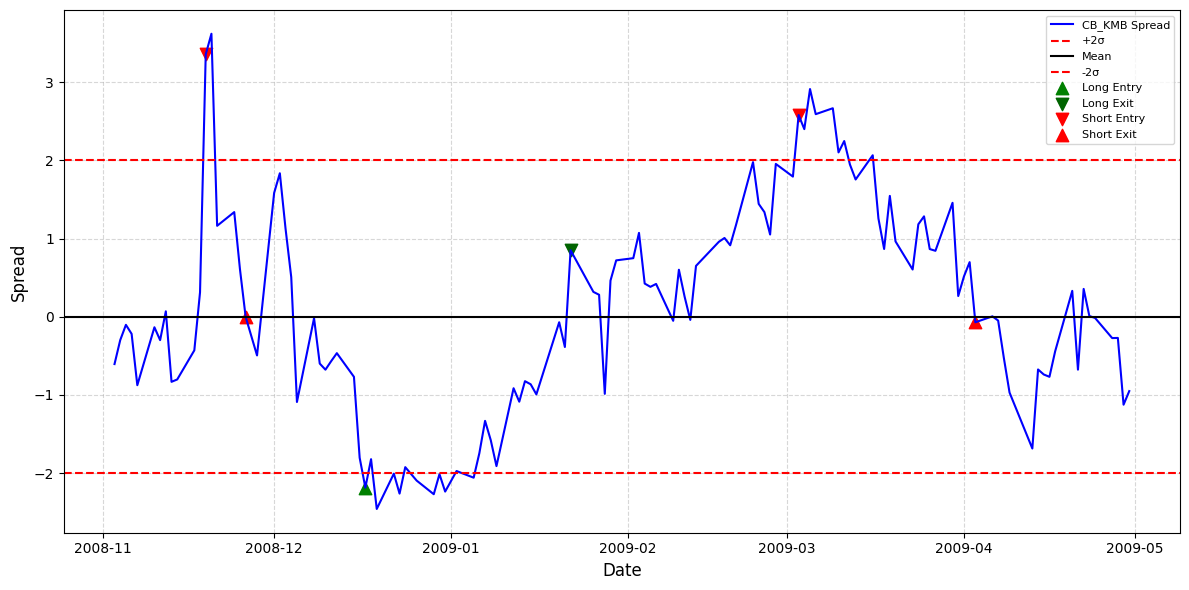

In [56]:

plot_spread_signals(spread_df_norm, "CB_KMB")
